### Delivery_time -> predict delivery time using sorting time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
df=pd.read_csv("delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.rename(columns={"Delivery Time":"d","Sorting Time":"s"},inplace=True)
df.head()

,d,s
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='d', ylabel='Density'>

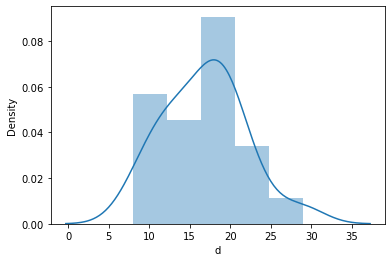

In [5]:
sns.distplot(df.d)

C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='s', ylabel='Density'>

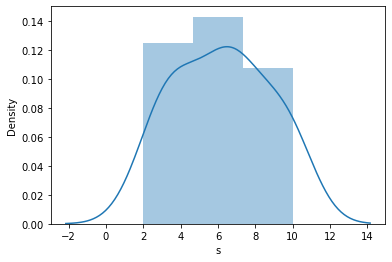

In [6]:
sns.distplot(df.s)

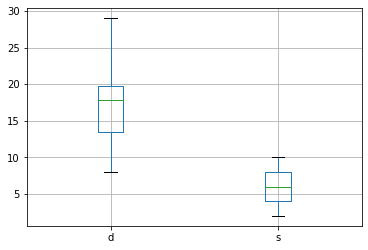

In [7]:
boxplot=df[['d','s']].boxplot()

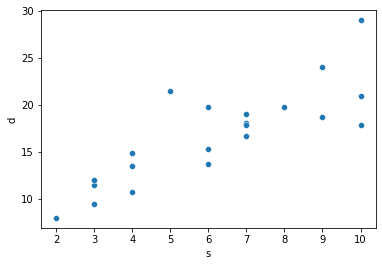

In [8]:
scatter=sns.scatterplot(x='s',y='d',data =df)

In [9]:
df.corr()

,d,s
d,1.000000,0.825997
s,0.825997,1.000000


<AxesSubplot:>

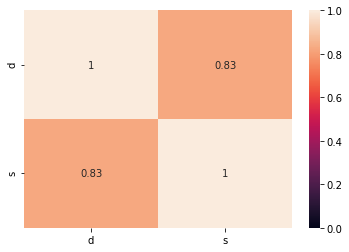

In [12]:
sns.heatmap(df.corr(),vmin=0,vmax=1,annot=True)

In [13]:
model = smf.ols('d~np.log(s)',data=df).fit()

In [14]:
model.params

Intercept    1.159684
np.log(s)    9.043413
dtype: float64

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           2.64e-06
Time:                        11:47:21   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(s)      9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
confi=(model.conf_int(0.05))

In [17]:
confi

,0,1
Intercept,-3.97778,6.297147
np.log(s),6.16977,11.917057


In [18]:
(model.tvalues,model.pvalues)

(Intercept    0.472460
 np.log(s)    6.586789
 dtype: float64,
 Intercept    0.641980
 np.log(s)    0.000003
 dtype: float64)

In [19]:
df1=df.iloc[:,1]

In [20]:
model.predict(df1)

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

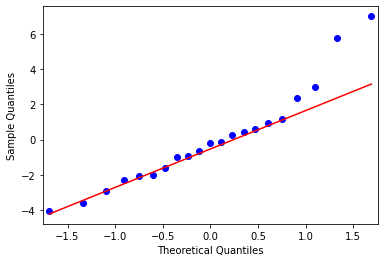

In [21]:
qq = sm.qqplot(model.resid,line='q')
plt.show()